<a href="https://colab.research.google.com/github/Jagaya/FCC-Data-Analysis/blob/main/cat_dog_classifier_with_pretrained_model_78p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

In [ ]:
# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 160
IMG_WIDTH = 160

In [ ]:
train_image_generator = ImageDataGenerator(rescale = 1./127.5 -1)
validation_image_generator = ImageDataGenerator(rescale = 1./127.5 -1)
test_image_generator = ImageDataGenerator(rescale = 1./127.5 -1)

val_data_gen = validation_image_generator.flow_from_directory(
    directory = validation_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = batch_size,
    class_mode="binary",
    shuffle=True,
    seed=42
)

test_data_gen = test_image_generator.flow_from_directory(
        PATH,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=1,
        classes=['test'],
        class_mode=None,
        shuffle=False
)

Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


In [ ]:
train_image_generator = ImageDataGenerator(
    rotation_range=40,
    zoom_range=0.1,
    vertical_flip=False,
    horizontal_flip = True,
    rescale=1./127.5 -1,
    width_shift_range =0.1,
    height_shift_range =0.1,
    shear_range=0.1,
    brightness_range = [0.8, 1],
    fill_mode="nearest")


train_data_gen = train_image_generator.flow_from_directory(
    directory = train_dir,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    # color_mode = "rgb",
    batch_size = batch_size,
    class_mode="binary",
    shuffle=True,
    # seed=42
)

Found 2000 images belonging to 2 classes.


In [ ]:
### Creating the Model

IMG_SHAPE = (IMG_HEIGHT, IMG_WIDTH, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

prediction_layer = tf.keras.layers.Dense(2,
                                         activation="softmax"
                                         )

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

# base_learning_rate = 0.0001
model.compile(#optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              optimizer="adam",
              #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_5 ( (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
# base_model.summary()

In [ ]:
### Training

# history = model.fit(train_batches,
#                     epochs=initial_epochs,
#                     validation_data=validation_batches)
epochs = 15

history = model.fit(train_data_gen,
                    epochs = epochs,
                    validation_data = val_data_gen)

Epoch 1/15
16/16 [==============================] - 24s 2s/step - loss: 0.7537 - accuracy: 0.5255 - val_loss: 0.7355 - val_accuracy: 0.5590
Epoch 2/15
16/16 [==============================] - 24s 1s/step - loss: 0.7055 - accuracy: 0.5715 - val_loss: 0.6763 - val_accuracy: 0.6100
Epoch 3/15
16/16 [==============================] - 23s 1s/step - loss: 0.6536 - accuracy: 0.6065 - val_loss: 0.6411 - val_accuracy: 0.6330
Epoch 4/15
16/16 [==============================] - 23s 1s/step - loss: 0.6394 - accuracy: 0.6290 - val_loss: 0.6194 - val_accuracy: 0.6560
Epoch 5/15
16/16 [==============================] - 23s 1s/step - loss: 0.6271 - accuracy: 0.6430 - val_loss: 0.6044 - val_accuracy: 0.6550
Epoch 6/15
16/16 [==============================] - 23s 1s/step - loss: 0.6089 - accuracy: 0.6700 - val_loss: 0.6051 - val_accuracy: 0.6540
Epoch 7/15
16/16 [==============================] - 23s 1s/step - loss: 0.5931 - accuracy: 0.6810 - val_loss: 0.5962 - val_accuracy: 0.6670
Epoch 8/15
16/16 [==

In [ ]:
# def format_example(image, label):
#   """
#   returns an image that is reshaped to IMG_SIZE
#   """
#   image = tf.cast(image, tf.float32)
#   image = (image/127.5) - 1
#   image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
#   return image, label

# train = raw_train.map(format_example)
# validation = raw_validation.map(format_example)
# test = raw_test.map(format_example)

# BATCH_SIZE = 32
# SHUFFLE_BUFFER_SIZE = 1000

# train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
# validation_batches = validation.batch(BATCH_SIZE)
# test_batches = test.batch(BATCH_SIZE)

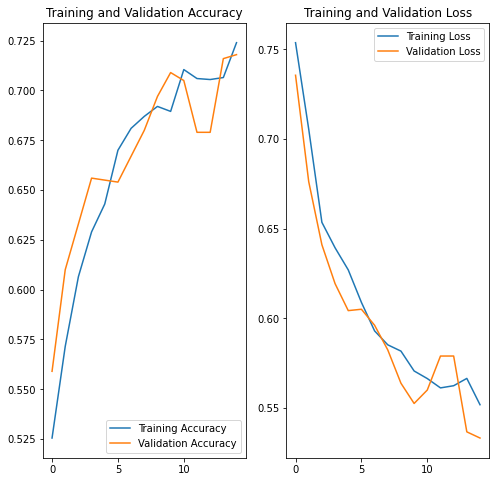

In [ ]:
#@title Run the next cell to visualize the accuracy and loss of the model.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
# epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Now it is time to use your model to predict whether a brand new image is a cat or a dog.

In this final cell, get the probability that each test image (from `test_data_gen`) is a dog or a cat. `probabilities` should be a list of integers. 

Call the `plotImages` function and pass in the test images and the probabilities corresponding to each test image.

After your run the cell, you should see all 50 test images with a label showing the percentage sure that the image is a cat or a dog. The accuracy will correspond to the accuracy shown in the graph above (after running the previous cell). More training images could lead to a higher accuracy.

Run this final cell to see if you passed the challenge or if you need to keep trying.

In [ ]:
predictions = model.predict(test_data_gen)
# predictions

In [ ]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(
                              #  probabilities,
                               predictions,
                               answers):
  if round(probability[1]) == answer:
    correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 0.78% of the images of cats and dogs.
You passed the challenge!


In [ ]:
model.save("dogs_vs_cats.h5")  # we can save the model and reload it at anytime in the future
# new_model = tf.keras.models.load_model('dogs_vs_cats.h5')